###### Update 5 April 2020

## Bismillah

Kali ini saya ingin membuat model logistik pasien positif virus covid-19 di indonesia berdasarkan data dari 1 Maret 2020 sampai hari ini. Notebook ini dibuat karena terinspirasi dari https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d 

insyaallah notebook ini akan selalu diupdate

# 1. Library

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Input Data

In [ ]:
df=pd.read_csv('../input/cor173/confirmed_acc.csv')

### Mengubah format tanggal menjadi jumlah hari terhitung dari 1 Maret 2020

In [ ]:
df = df.loc[:,['date','cases']]
FMT = '%m/%d/%Y'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("3/1/2020", FMT)).days  )

In [ ]:
df

In [ ]:
#Data tambahan sejak 18 Maret 2020
df = df.append({'date' : 17 , 'cases' : 227} , ignore_index=True) #18 Maret
df= df.append({'date' : 18, 'cases' : 309}, ignore_index=True) #19 Maret
df= df.append({'date' : 19, 'cases' : 369}, ignore_index=True) #20 Maret
df=df.append({'date' : 20, 'cases' : 450}, ignore_index=True) #21 Maret
df=df.append({'date' : 21, 'cases' : 514}, ignore_index=True) #22 Maret
df=df.append({'date' : 22, 'cases' : 579}, ignore_index=True) #23 Maret
df=df.append({'date' : 23, 'cases' : 686}, ignore_index=True) #24 Maret
df=df.append({'date' : 24, 'cases' : 790}, ignore_index=True) #25 Maret
df=df.append({'date' : 25, 'cases' : 893}, ignore_index=True) #26 Maret
df=df.append({'date' : 26, 'cases' : 1046}, ignore_index=True) #27 Maret
df=df.append({'date' : 27, 'cases' : 1155}, ignore_index=True) #28 Maret
df=df.append({'date' : 28, 'cases' : 1285}, ignore_index=True) #29 Maret
df=df.append({'date' : 29, 'cases' : 1414}, ignore_index=True) #30 Maret
df=df.append({'date' : 30, 'cases' : 1528}, ignore_index=True) #31 Maret
df=df.append({'date' : 31, 'cases' : 1677}, ignore_index=True) #1 April
df=df.append({'date' : 32, 'cases' : 1790}, ignore_index=True) #2 April
df=df.append({'date' : 33, 'cases' : 1986}, ignore_index=True) #3 April
df=df.append({'date' : 34, 'cases' : 2092}, ignore_index=True) #4 April
df=df.append({'date' : 35, 'cases' : 2273}, ignore_index=True) #5 April




In [ ]:
df

In [ ]:
#df=df.drop([0,1,2,3,4,5,6,7,8])
            
            #13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38]) 

# 3. Membuat Model Logistik

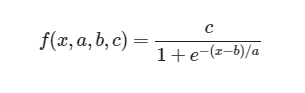

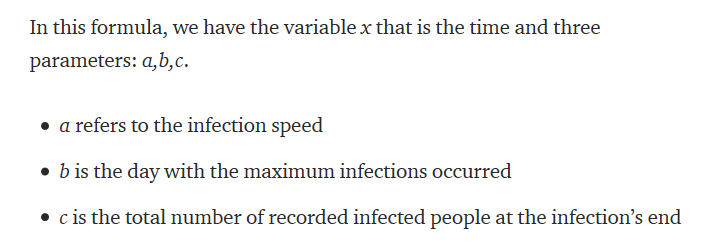

In [ ]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

In [ ]:
x = list(df.iloc[39:,0])
y = list(df.iloc[39:,1])
fit = curve_fit(logistic_model,x,y)

In [ ]:
A,B=fit
#nilai a,b,
A

In [ ]:
#a=A[0]
#b=A[1]
#c=A[2]

In [ ]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]
errors

In [ ]:
#Kemungkinan terburuk
a=A[0]+errors[0]
b=A[1]+errors[1]
c=A[2]+errors[2]

In [ ]:
#Jumlah hari maksimal dari 1 Maret 2020
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))
sol

In [ ]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)# Real data
plt.scatter(x,y,label="Real data",color="red")

# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,a,b,c) for i in x+pred_x], label="Logistic model" )

plt.legend()
plt.xlabel("Days since 1 March 2020")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.9,c*1.1))
plt.show()

# R Square

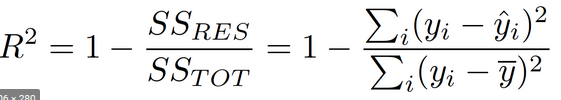

In [ ]:
y_pred_logistic = [logistic_model(i,a,b,c) for i in x]
p=mean_squared_error(y,y_pred_logistic)

s1=(np.subtract(y,y_pred_logistic)**2).sum()
s2=(np.subtract(y,np.mean(y))**2).sum()
r=1-s1/s2
print("R^2 adalah {}".format(r))
print("Mean square errornya adalah {}".format(p))

In [ ]:
### Tanggal wabah maksimal
from datetime import timedelta, date
from datetime import datetime  
from datetime import timedelta 

start_date = "01/03/20"

date_1 = datetime.strptime(start_date, "%d/%m/%y")

end_date = date_1 + timedelta(days=sol)

x=end_date.strftime("%d %B %Y")

# Kesimpulan

In [ ]:
print("Jumlah kasus maksimal di indonesia menurut prediksi adalah {:f}".format(A[2]+errors[2])) #Penambahan dengan error
print("Puncak wabah adalah {:.0f} hari setelah 1 Maret 2020 atau {}". format(sol,x))

Notebook ini benar-benar terinspirasi dari https://towardsdatascience.com/covid-19-infection-in-italy-mathematical-models-and-predictions-7784b4d7dd8d. 

**Mungkin prediksi yang dilakukan tidak efektif dikarenakan data yang digunakan untuk prediksi belum banyak. Kebijakan-kebijakan pemerintah juga memengaruhi jumlah kasus positif di indonesia. dan banyak lagi variabel yang tidak diperhitungkan pada prediksi ini.**

**We aren’t health professionals or epidemiologists**

Intinya kita sebagai masyarakat Indonesia, harus mematuhi arahan dari pemerintah agar resiko penularan kecil.
yaitu dengan cara sosial distancing. Dengan membatasi gerak kita insyaallah resiko penularan kecil.

Semoga kita selalu diberi kesehatan, aamiin.

## Wallahu a'lam